In [ ]:
import random
import numpy as np

import matplotlib.pyplot as plt

import warnings 

from sklearn.datasets import make_swiss_roll, make_blobs, load_digits
from sklearn import decomposition
from sklearn.manifold import TSNE

In [ ]:
%matplotlib inline
# %config InlineBackend.figure_formats = ["svg"]
%config InlineBackend.figure_formats = ["retina"]

# Q1: Fill-in the PCA function  
In this question, you should implement PCA using the numpy library only. 

In [ ]:
def pca(X, num_components): 
    '''Input: 
        X: data
        num_components: number of components after PCA reduction. 
        The function returns the projected X with n_components dimensions '''
    # start you implementation here!
    X_1 = np.array(X, dtype=float)
    for i in range(X.shape[1]):
      m = np.mean(X_1[:, i])
      X_1[:, i] -= m
    C = X_1.T @ X_1
    w, v = np.linalg.eig(C)
    eigen_pairs = [(w[i], v[:,i]) for i in range(w.shape[0])]
    eigen_pairs.sort(key=lambda x: x[0], reverse = True)
    projection = np.stack([eigen_pairs[i][1] for i in range(num_components)], axis = 1)
    X_reduced = X_1 @ projection
    
    return X_reduced

To test your implementation, compare your implementation `pca` with the pca function from the sklearn library. 

In [ ]:
# Generate dummy dataset 100 times.
error_max = 0
error_mean = 0
for _ in range(100): 
    lower_bound = np.random.randint(10, 50) 
    upper_bound = np.random.randint(100, 1000) 
    num_components = np.random.randint(1, 9)
    X = np.random.randint(lower_bound, upper_bound, 1000).reshape(100,10) 
    X_pca_sklearn = decomposition.PCA(n_components=num_components).fit_transform(X) 
    X_pca = pca(X, num_components)
    # The PCA solution is unique up to the sign of the eigenvectors.
    # We use X^T * X to calculate the error.
    error = np.linalg.norm( np.dot(X_pca_sklearn.transpose(), X_pca_sklearn) 
                   - np.dot(X_pca.transpose(), X_pca)
                   ,'fro')
    assert error < 1e-7
    error_max = max(error_max, error)
    error_mean += error

print(f"Average error: {error_mean/100:12.4}")
print(f"Largest error: {error_max:12.4}")

Average error:     1.93e-08
Largest error:    9.416e-08


q1/ The average error is 1.93e-08 so the accuracy for my PCA compare to the sklearn is very high. Also, I have tested to print out the value of X for the numpy-only version of PCA and sklearn, and can tell that the sign of elements is not guaranteed the same but this should not affect the result.

# TSNE from Sklearn library

The following helper functions demonstrate how to use TSNE from the scikit-learn library.

In [ ]:
n_samples = 500

def produce_plots_3D(data_generator):
    X, X_color, title = data_generator(n_samples)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X_color)
    plt.title(title)
    plt.show()
    return X, X_color, title

def plot_data(X, X_color, title):
    plt.scatter(X[:,0], X[:,1], c=X_color)
    plt.title(title)    
    plt.show()

def pca_plots_2d(X, X_color, title): 
    # Fit and plot PCA
    plot_data(pca(X, 2), X_color, title + " - PCA")
    
def tsne_plots_2d(X, X_color, title): 
    # Fit and plot TSNE 
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore",category=FutureWarning)
        X_tsne = TSNE(n_components=2).fit_transform(X)        
    plot_data(X_tsne, X_color, title + " - tSNE")

# Q2: PCA vs TSNE projection on the Digits Dataset 
Using your PCA implementation from Q1 and the helper functions given above, run the following cells to compute and plot the 2-dimensional embedding generated by PCA and TSNE for the Digits dataset. Describe your observations. Explain the pros and cons of each algorithm. (You can just make a new cell at the end of the question to write down your observation and just turn in the notebook/Colab) 

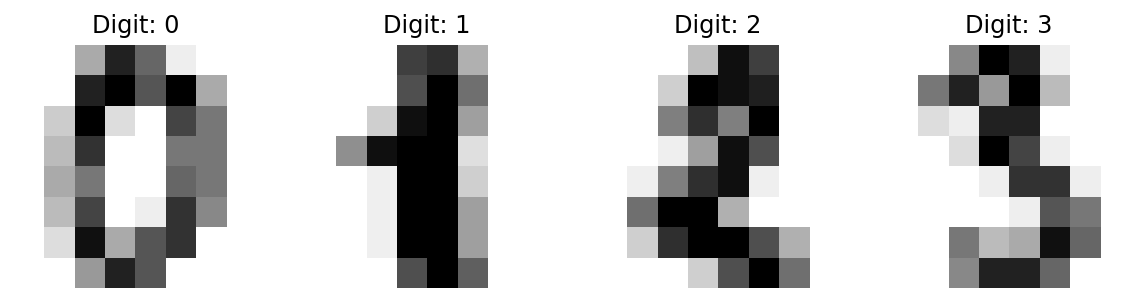

In [ ]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Digit: %i" % label)

In [ ]:
def generate_digits(n_samples):
    X, y = load_digits(n_class = 10, return_X_y = True)
    return X, y, "Digits" 

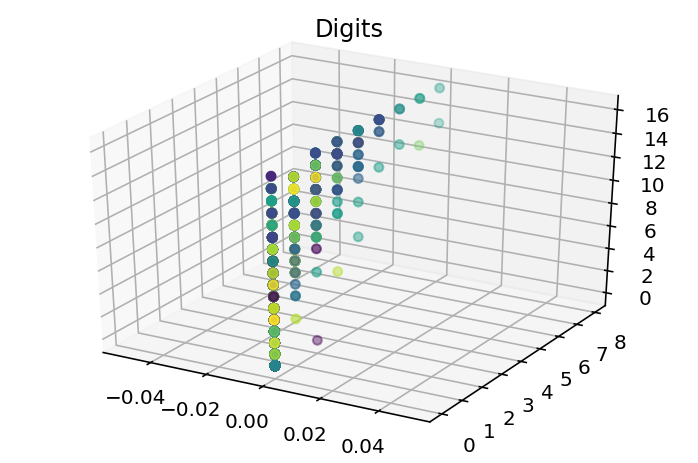

In [ ]:
X, X_color, title = produce_plots_3D(generate_digits)

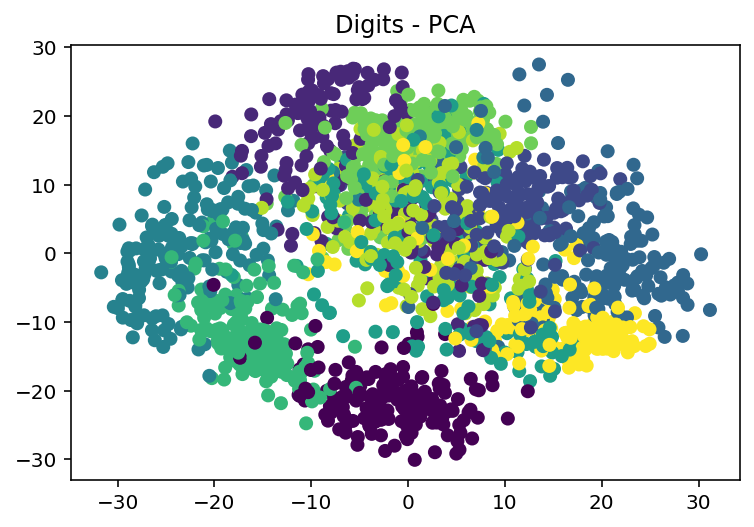

In [ ]:
pca_plots_2d(X, X_color, title)

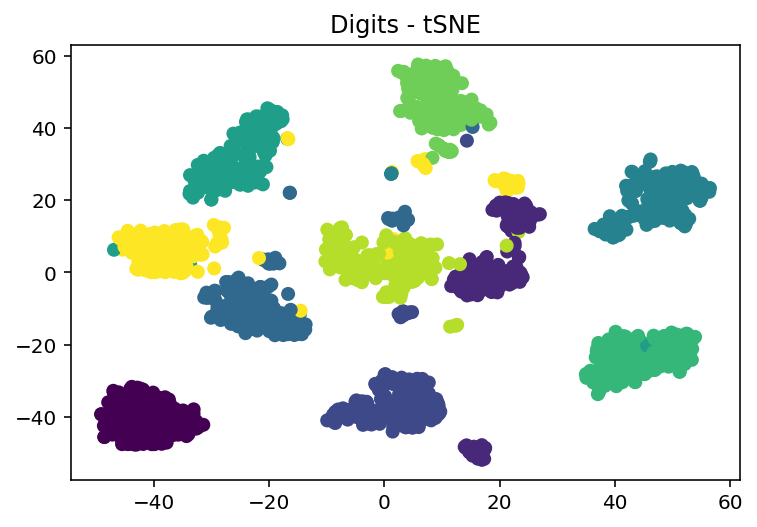

In [ ]:
tsne_plots_2d(X, X_color, title)

q2/ We can see tSNE have better visulization result compare to PCA, the PCA have too much overlap. However, the computation cost of TSNE is expensive compare to PCA. Also, PCA will always produces the same plot even we run the code above multiple time, however, tSNE will result a different graph if we try to run the same code again.



# Q3: Investigating the Role of the Perplexity in TSNE for the Long Clusters Dataset.
Implement the function `tsne_plots_perplexity` to iterate through the different values of perplexity. Observe and comment on the effect of the perplexity on the 2D TSNE visualization of the long clusters dataset. The long clusters dataset is composed of two clusters in 2D arranged in parallel line with some guassian noise. 

In [ ]:
def generate_longclusters(): 

    x1 = np.asarray([i for i in range(-50, 50, 1)])
    x2 = np.asarray([i for i in range(-40, 60, 1)])
    y1 = x1 + np.random.normal(0, 3, 100)
    y2 = x2 + np.random.normal(-20, 3, 100)

    x1, x2 = np.expand_dims(x1, axis=1), np.expand_dims(x2, axis=1) 
    y1, y2 = np.expand_dims(y1, axis=1), np.expand_dims(y2, axis=1) 
    xy1, xy2 = np.concatenate((x1,y1), axis=1), np.concatenate((x2,y2), axis=1)
    xy = np.concatenate((xy1, xy2), axis=0)

    x1_color = [1] * 100 
    x2_color = [2] * 100 
    X_color = x1_color + x2_color
    
    plt.scatter(xy[:,0], xy[:,1], c=X_color)
    plt.title('long clusters')    
    plt.show()

    return xy, X_color, 'long clusters'

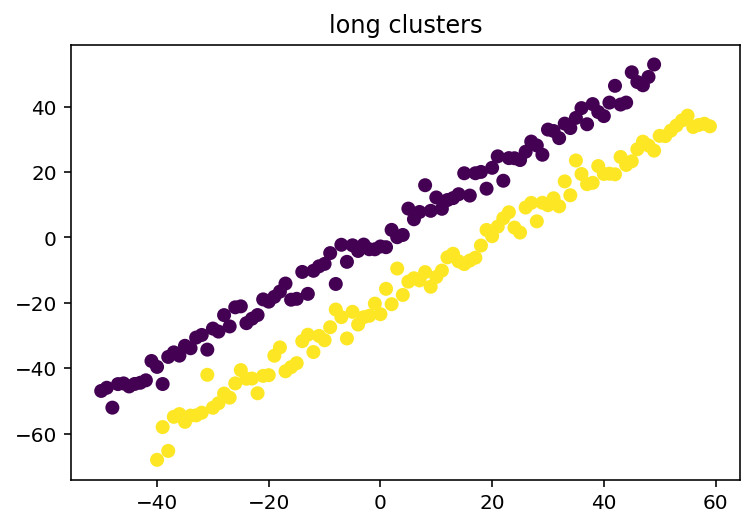

In [ ]:
X, X_color, title = generate_longclusters()

In [ ]:
def tsne_plots_perplexity(X, X_color, title): 
    # Start your implementation here! 
    # Fit and plot TSNE 
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore",category=FutureWarning)
        X_tsne_1 = TSNE(n_components=2, perplexity = 1.0).fit_transform(X)
        X_tsne_30 = TSNE(n_components=2, perplexity = 30.0).fit_transform(X)
        X_tsne_50 = TSNE(n_components=2, perplexity = 50.0).fit_transform(X) 
        X_tsne_500 = TSNE(n_components=2, perplexity = 500.0).fit_transform(X)      
    plot_data(X_tsne_1, X_color, title + " - tSNE" + "perplexity = 1")
    plot_data(X_tsne_30, X_color, title + " - tSNE" + "perplexity = 30")
    plot_data(X_tsne_50, X_color, title + " - tSNE" + "perplexity = 50")
    plot_data(X_tsne_500, X_color, title + " - tSNE" + "perplexity = 500")

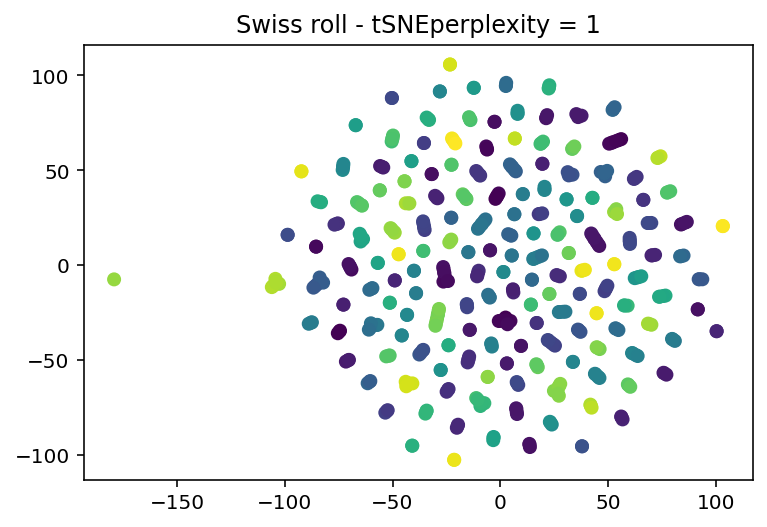

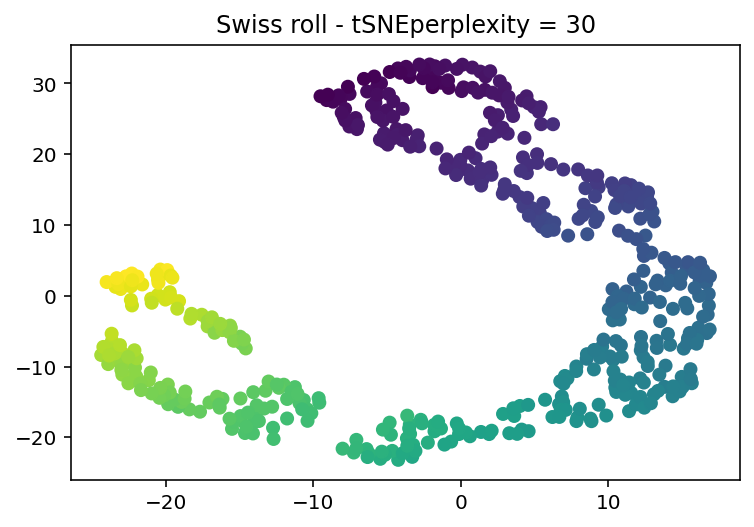

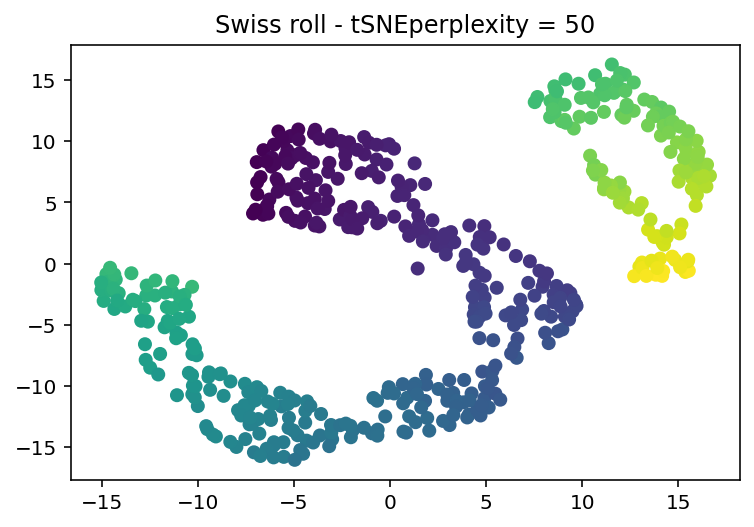

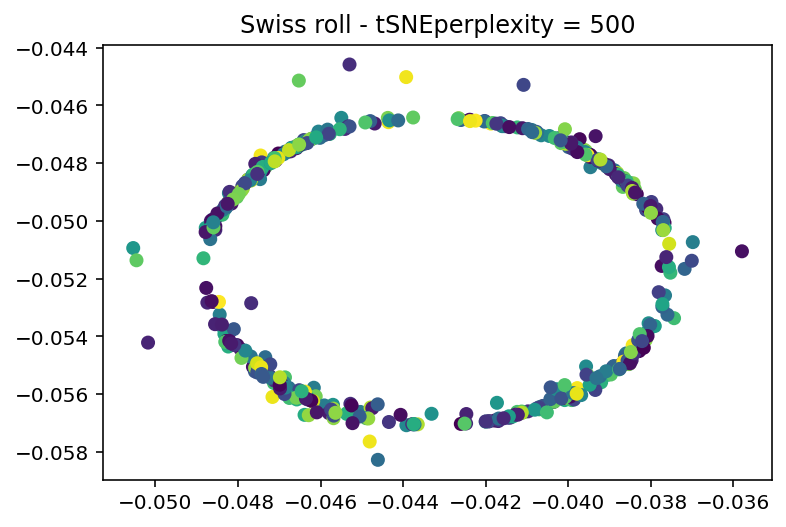

In [ ]:
# run this cell to test your implementation! 
tsne_plots_perplexity(X, X_color, title)

q3 / One the lecture note we know for small perplexity, only neighbors are accounted for and for large perplexity, only relatively far away neighbors are considered, this also can observed from the plots above, the valve 30, 50 of perplexity have better clustering plot, where the data with similar color gathering together, however, for perplexity 1 and 500, the plot have less sense and unable to conclude the relationship for groups of datas.

# Q4: PCA vs TSNE Reduction on Swiss_Roll Dataset 
Run the following cells. Compute and plot the 2-dimensional embedding generated by PCA and TSNE on the `Swiss_Roll` dataset. Describe your observations. Describe the pros and cons of each method.

In [ ]:
def generate_swiss_roll_data(n_samples):
    noise = 0.05
    X, _ = make_swiss_roll(n_samples=n_samples, noise=noise)
    X[:, 1] *= .5
    distance_from_y_axis = X[:, 0] ** 2 + X[:, 2] ** 2 
    return X, distance_from_y_axis, "Swiss roll"

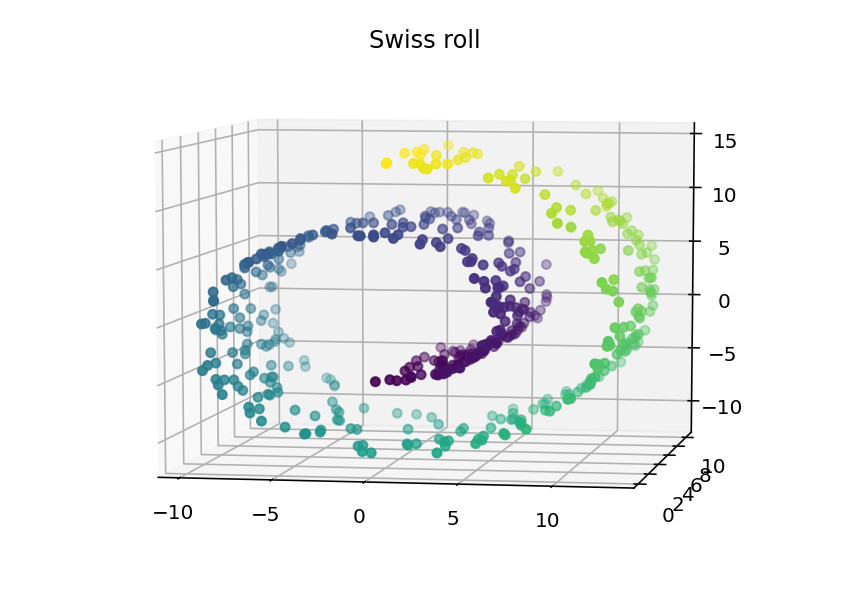

In [ ]:
X, X_color, title = generate_swiss_roll_data(n_samples)

fig = plt.figure()
ax = fig.add_subplot(projection='3d', elev=7, azim=-80)
ax.set_position([0, 0, 0.95, 1])
ax.scatter(X[:,0], X[:,1], X[:,2], c=X_color)
plt.title(title)
plt.show()

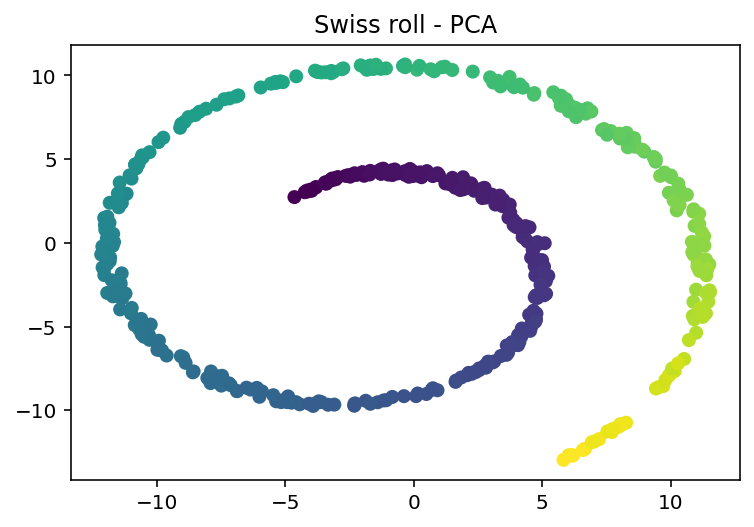

In [ ]:
pca_plots_2d(X, X_color, title)

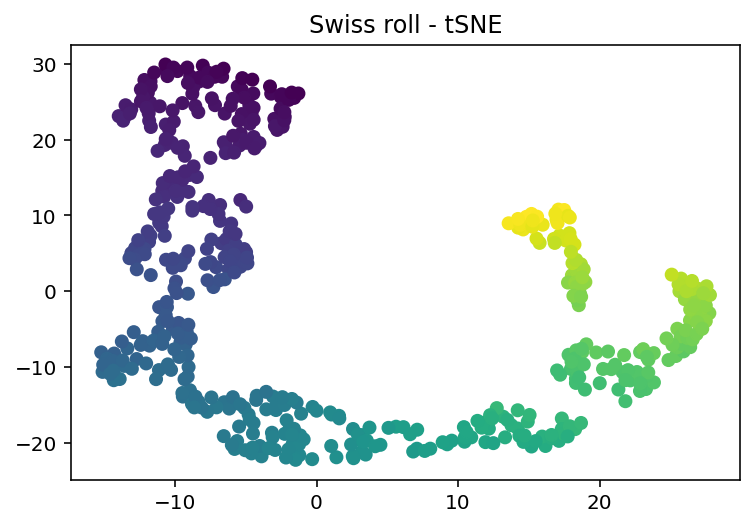

In [ ]:
tsne_plots_2d(X, X_color, title)

q4 / Although PCA run faster compare to tSNE, however it not doing so well in non-linear dataset. For dataset like Swiss roll, is diffcult to represented by a straight line or a hyperplane.

# Q5: TSNE perplexity for the Swiss Roll dataset

Run the following cell and describe the effect of perplexity on the Swiss Roll dataset for TSNE visualization. How would you choose the perplexity and why?

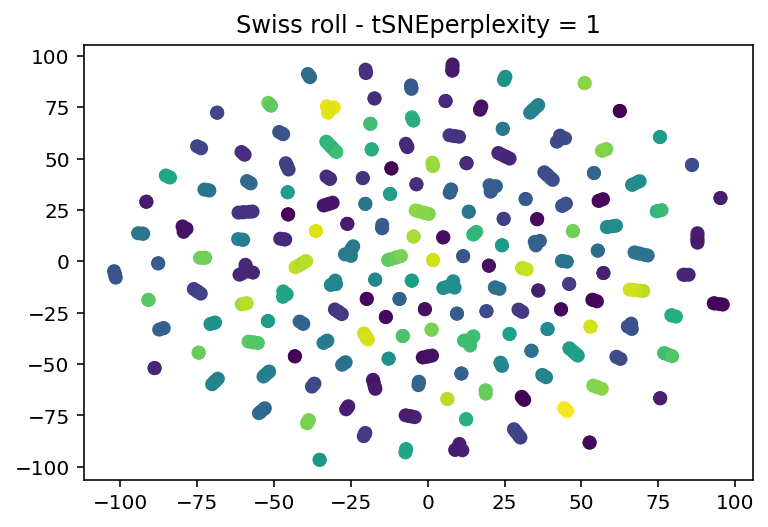

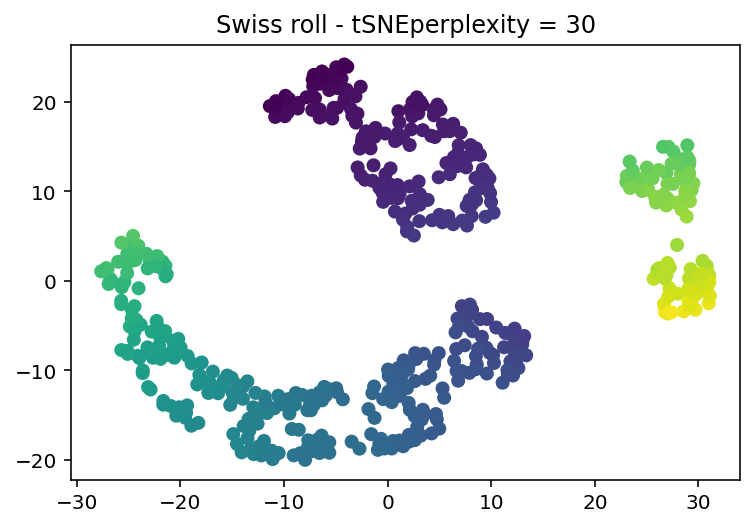

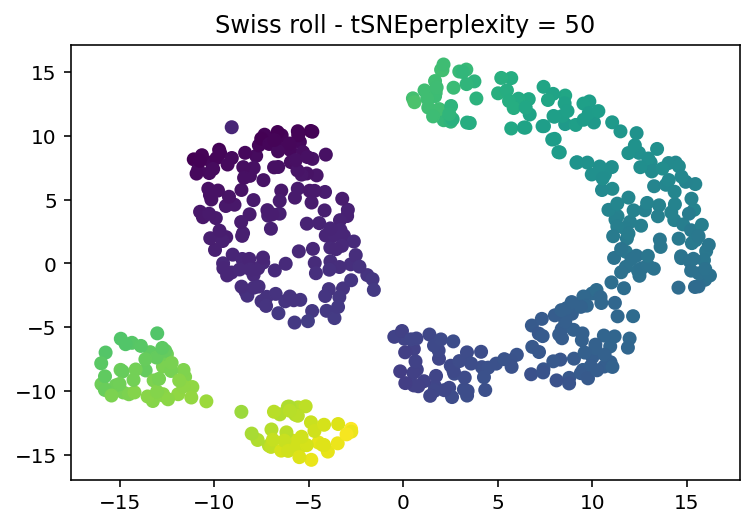

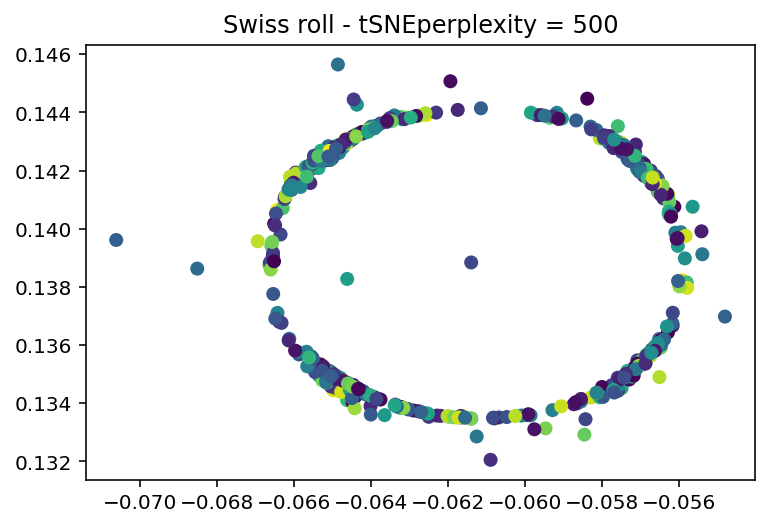

In [ ]:
X, X_color, title = generate_swiss_roll_data(n_samples)
tsne_plots_perplexity(X, X_color, title)

q5 / we observe a similar result compare to q3, the results are sensitive to the choice of perplexity and for the best result should consider selecting a value between 5 and 50, in the experiment above, we see the perplexity = 30 and 50 result a good plot that able to see different groups of datas clustering together, however perplexity = 1 and 500 unable to conclude any information from the plot. Since small perplexity only account the nearest neighbors and large perplexity only consider the relatively far away neighbors.

# Q6: PCA vs TSNE Reduction on Gaussian Blob Dataset 

You are given the following code to generate 6 Gaussian Blobs. Please run the following code to compute and plot the 2D projection generated by PCA and TSNE. Describe your observations. 

In [ ]:
def generate_gaussian_blobs(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=6, n_features=3, random_state=3)
    return X, y, "Gaussian blobs" 

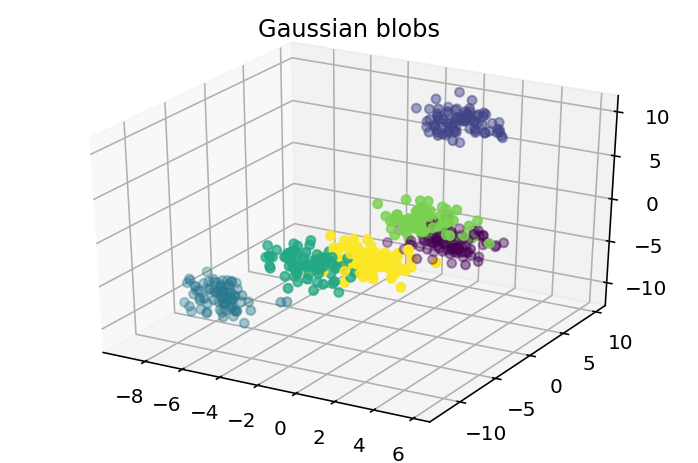

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs)

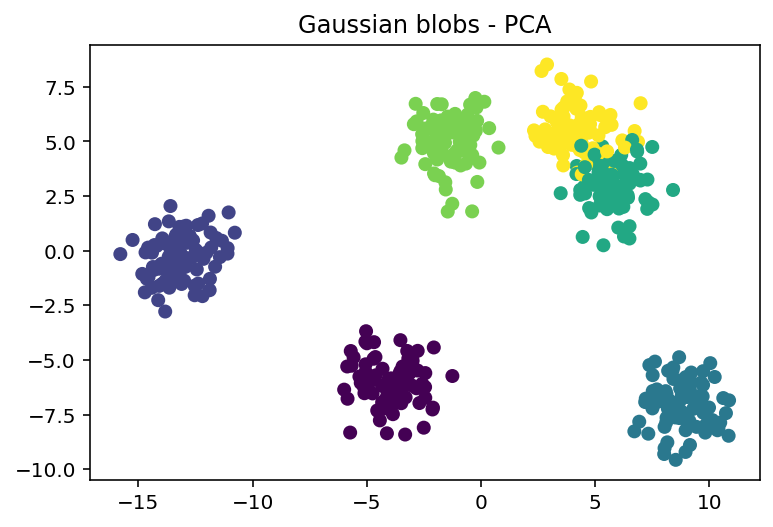

In [ ]:
pca_plots_2d(X, X_color, title)

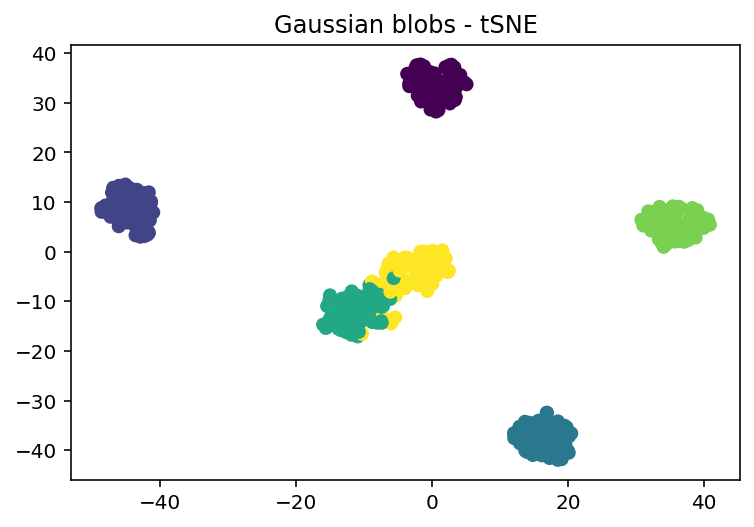

In [ ]:
tsne_plots_2d(X, X_color, title)

q6 / Even two method work well on the Gaussian Blob, the way they cluster is different. PCA identify the principal components（ we use SVD to pick the first two largest eigenvector) However the tSNE basic on the distance between points.

# Q7: PCA vs TSNE Reduction on Gaussian Blob with different sizes

Based on the function `generate_gaussian_blobs` above, please implement the following function `generate_gaussian_blobs_diff_size`, so that two different Gaussian blobs are generated. The standard deviation (or the radius) of the first Gaussian blob should be three times that of the second Gaussian blob. Plot and comment on your results.

In [ ]:
def generate_gaussian_blobs_diff_size(n_samples): 
    # start your implementation here! 
    X, y = make_blobs(n_samples=n_samples, centers=2, n_features=3,random_state=3, cluster_std = 1/3)
    #X[y == 1, :] /= 8
    #X_color = y / np.max(y + 1)
    #print(y)
    return X, y, "Gaussian blobs different sizes"

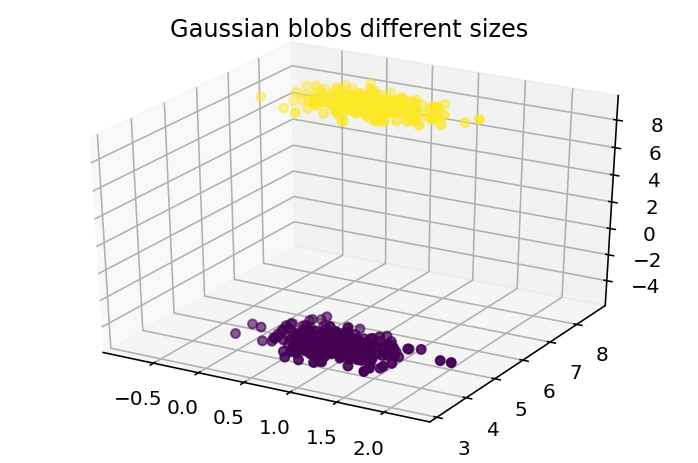

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs_diff_size)

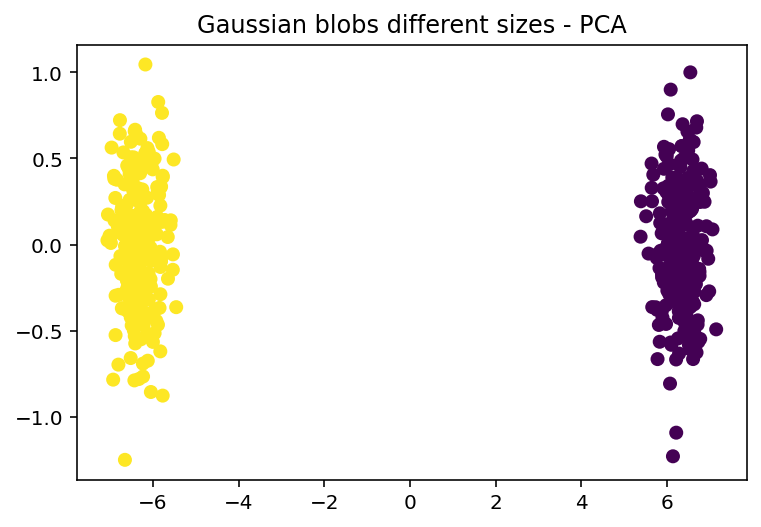

In [ ]:
pca_plots_2d(X, X_color, title)

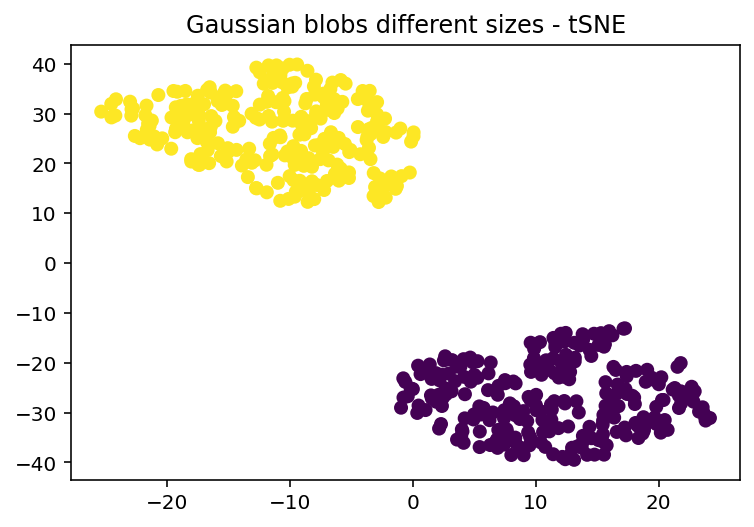

In [ ]:
tsne_plots_2d(X, X_color, title)

q7 / For only two group, we see both method perfectly separate the datasets.

# Q8: Effects of outliers on the 2D visualization using PCA and TSNE. 

Implement the following function `generate_gaussian_blobs_outliers(n_samples)` by modifying the function `generate_gaussian_blobs` so that there are 30 points randomly sampled in the space $([-50, 50], [-50, 50], [-50, 50])$. We consider those randomly generated points as outliers. 

Run the following cells and compare the effects of the outliers on the PCA and TSNE projections. 

In [ ]:
def generate_gaussian_blobs_outliers(n_samples):
    # start your implementation here! 
    X, y = make_blobs(n_samples=n_samples, centers=6, n_features=3, random_state=3)
    X_outliers = np.random.randint(-50, 50, size = (30, 3))
    X_with_outliers = np.vstack((X, X_outliers))
    y_outliers = np.ones((30,)) * 6
    y_with_outliers = np.concatenate((y, y_outliers))
    return X_with_outliers, y_with_outliers, "Gaussian blobs" 

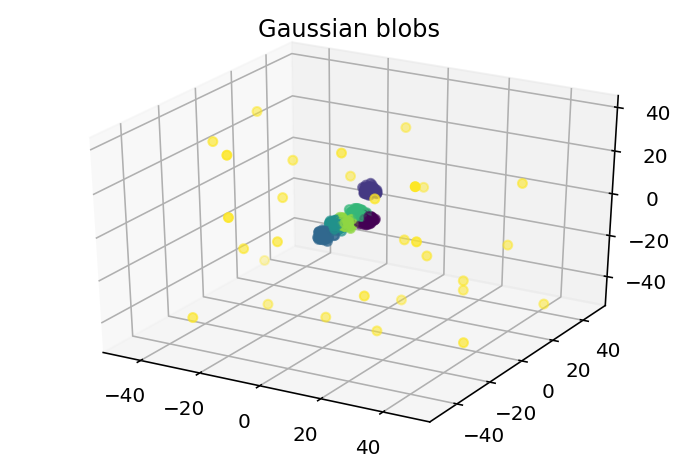

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs_outliers)

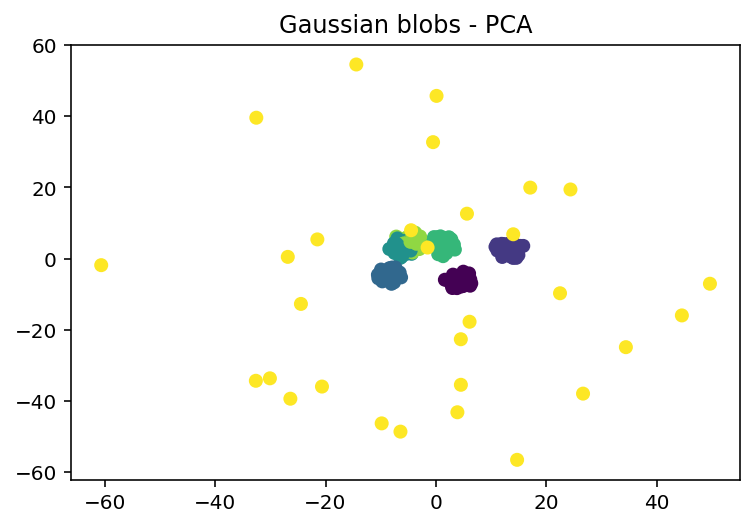

In [ ]:
pca_plots_2d(X, X_color, title)

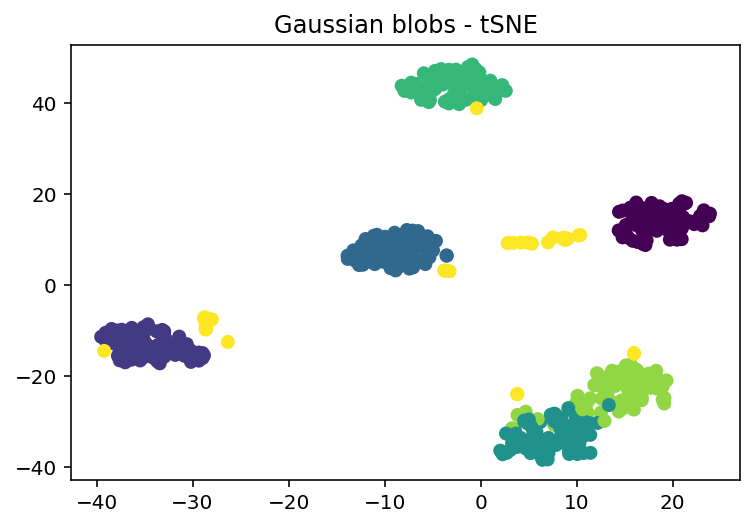

In [ ]:
tsne_plots_2d(X, X_color, title)

 q8/ We see for PCA, outliers are easy to observe from the 2d plot, most of the outliers are faraway from the original clusters and randomly distributed in the 2d space. however, the outliers for tSNE are close to the original cluster, and is hard to use the graph to identify the outliers